In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2


In [6]:
# Load the CSV file
df = pd.read_csv('/content/sales.csv')

In [7]:
# Basic information
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nColumn Names and Types:")
print(df.dtypes)


Dataset Shape: 1194 rows × 12 columns

Column Names and Types:
Order ID        object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
Order Date      object
CustomerName    object
State           object
City            object
Year-Month      object
dtype: object


In [8]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-26776    9726    1275         5  Electronics  Electronic Games   
1  B-26776    9726    1275         5  Electronics  Electronic Games   
2  B-26776    9726    1275         5  Electronics  Electronic Games   
3  B-26776    4975    1330        14  Electronics          Printers   
4  B-26776    4975    1330        14  Electronics          Printers   

  PaymentMode  Order Date   CustomerName     State     City Year-Month  
0         UPI  2023-06-27  David Padilla   Florida    Miami    2023-06  
1         UPI  2024-12-27  Connor Morgan  Illinois  Chicago    2024-12  
2         UPI  2021-07-25   Robert Stone  New York  Buffalo    2021-07  
3         UPI  2023-06-27  David Padilla   Florida    Miami    2023-06  
4         UPI  2024-12-27  Connor Morgan  Illinois  Chicago    2024-12  


In [9]:
print("\nLast 5 rows:")
print(df.tail())


Last 5 rows:
     Order ID  Amount  Profit  Quantity         Category Sub-Category  \
1189  B-26370    8825    3594        15        Furniture       Tables   
1190  B-26298    2082     642         8      Electronics       Phones   
1191  B-26298    2082     642         8      Electronics       Phones   
1192  B-26298    2082     642         8      Electronics       Phones   
1193  B-25068     914     163        13  Office Supplies      Markers   

     PaymentMode  Order Date        CustomerName     State           City  \
1189  Debit Card  2024-07-31        Megan Mclean  New York  New York City   
1190         EMI  2020-06-02        Caitlin Hunt  New York      Rochester   
1191         EMI  2022-12-15       Jenna Holland     Texas         Austin   
1192         EMI  2020-08-07  Stephanie Oconnell  New York        Buffalo   
1193         UPI  2024-10-26         Andrea Hill  Illinois        Chicago   

     Year-Month  
1189    2024-07  
1190    2020-06  
1191    2022-12  
1192    2020

In [10]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB
None


In [11]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64


In [12]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 0


In [13]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
# Extract additional date features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Day of Week'] = df['Order Date'].dt.day_name()

In [16]:
# Strip whitespace from string columns
string_cols = df.select_dtypes(include=['object']).columns
for col in string_cols:
    df[col] = df[col].str.strip()


In [17]:
print("\nData types after preprocessing:")
print(df.dtypes)


Data types after preprocessing:
Order ID                object
Amount                   int64
Profit                   int64
Quantity                 int64
Category                object
Sub-Category            object
PaymentMode             object
Order Date      datetime64[ns]
CustomerName            object
State                   object
City                    object
Year-Month              object
Year                     int32
Month                    int32
Quarter                  int32
Day of Week             object
dtype: object


In [18]:
# Descriptive statistics for numerical columns
print("\nNumerical Columns Summary:")
print(df.describe())


Numerical Columns Summary:
            Amount       Profit     Quantity                     Order Date  \
count  1194.000000  1194.000000  1194.000000                           1194   
mean   5178.089615  1348.992462    10.674204  2022-10-03 21:49:44.924623104   
min     508.000000    50.000000     1.000000            2020-03-22 00:00:00   
25%    2799.000000   410.000000     6.000000            2021-09-06 00:00:00   
50%    5152.000000  1014.000000    11.000000            2022-10-07 00:00:00   
75%    7626.000000  2035.000000    16.000000            2023-12-12 00:00:00   
max    9992.000000  4930.000000    20.000000            2025-03-15 00:00:00   
std    2804.921955  1117.992573     5.777102                            NaN   

              Year       Month      Quarter  
count  1194.000000  1194.00000  1194.000000  
mean   2022.240369     6.71273     2.571189  
min    2020.000000     1.00000     1.000000  
25%    2021.000000     4.00000     2.000000  
50%    2022.000000     7.00000

In [20]:
# Additional statistics using NumPy
print("\n" + "-"*80)
print("NUMPY STATISTICAL ANALYSIS")
print("-"*80)

for col in ['Amount', 'Profit', 'Quantity']:
    print(f"\n{col} Statistics:")
    print(f"  Mean: {np.mean(df[col]):.2f}")
    print(f"  Median: {np.median(df[col]):.2f}")
    print(f"  Std Dev: {np.std(df[col]):.2f}")
    print(f"  Variance: {np.var(df[col]):.2f}")
    print(f"  Min: {np.min(df[col]):.2f}")
    print(f"  Max: {np.max(df[col]):.2f}")
    print(f"  25th Percentile: {np.percentile(df[col], 25):.2f}")
    print(f"  75th Percentile: {np.percentile(df[col], 75):.2f}")


--------------------------------------------------------------------------------
NUMPY STATISTICAL ANALYSIS
--------------------------------------------------------------------------------

Amount Statistics:
  Mean: 5178.09
  Median: 5152.00
  Std Dev: 2803.75
  Variance: 7860997.91
  Min: 508.00
  Max: 9992.00
  25th Percentile: 2799.00
  75th Percentile: 7626.00

Profit Statistics:
  Mean: 1348.99
  Median: 1014.00
  Std Dev: 1117.52
  Variance: 1248860.57
  Min: 50.00
  Max: 4930.00
  25th Percentile: 410.00
  75th Percentile: 2035.00

Quantity Statistics:
  Mean: 10.67
  Median: 11.00
  Std Dev: 5.77
  Variance: 33.35
  Min: 1.00
  Max: 20.00
  25th Percentile: 6.00
  75th Percentile: 16.00


In [21]:
# Profit Margin
df['Profit Margin %'] = (df['Profit'] / df['Amount'] * 100).round(2)
print(f"\nAverage Profit Margin: {df['Profit Margin %'].mean():.2f}%")



Average Profit Margin: 26.06%


In [22]:
print("\n" + "="*80)
print("CATEGORICAL DATA ANALYSIS")
print("="*80)

categorical_cols = ['Category', 'Sub-Category', 'PaymentMode', 'State', 'City']

for col in categorical_cols:
    print(f"\n{col} - Unique Values: {df[col].nunique()}")
    print(df[col].value_counts().head(10))


CATEGORICAL DATA ANALYSIS

Category - Unique Values: 3
Category
Furniture          407
Office Supplies    399
Electronics        388
Name: count, dtype: int64

Sub-Category - Unique Values: 12
Sub-Category
Tables              122
Pens                114
Sofas               114
Markers             110
Electronic Games    104
Paper               104
Phones              101
Printers             95
Laptops              88
Bookcases            88
Name: count, dtype: int64

PaymentMode - Unique Values: 5
PaymentMode
Debit Card     260
Credit Card    258
UPI            252
EMI            218
COD            206
Name: count, dtype: int64

State - Unique Values: 6
State
New York      226
California    218
Florida       200
Texas         189
Illinois      181
Ohio          180
Name: count, dtype: int64

City - Unique Values: 18
City
Buffalo          90
San Francisco    84
Orlando          77
Rochester        74
San Diego        73
Dallas           72
Cleveland        70
Springfield      68
Miami

In [23]:
print("\n" + "="*80)
print("GROUPBY ANALYSIS")
print("="*80)

# Sales by Category
print("\nSales by Category:")
category_sales = df.groupby('Category').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Order ID': 'count'
}).round(2)
category_sales.columns = ['Total Amount', 'Total Profit', 'Total Quantity', 'Order Count']
category_sales['Avg Profit Margin %'] = (category_sales['Total Profit'] / category_sales['Total Amount'] * 100).round(2)
print(category_sales.sort_values('Total Amount', ascending=False))


GROUPBY ANALYSIS

Sales by Category:
                 Total Amount  Total Profit  Total Quantity  Order Count  \
Category                                                                   
Office Supplies       2089510        551575            4046          399   
Electronics           2054456        518580            4258          388   
Furniture             2038673        540542            4441          407   

                 Avg Profit Margin %  
Category                              
Office Supplies                26.40  
Electronics                    25.24  
Furniture                      26.51  


In [24]:
# Sales by Payment Mode
print("\n\nSales by Payment Mode:")
payment_sales = df.groupby('PaymentMode').agg({
    'Amount': ['sum', 'mean', 'count']
}).round(2)
print(payment_sales.sort_values(('Amount', 'sum'), ascending=False))



Sales by Payment Mode:
              Amount               
                 sum     mean count
PaymentMode                        
Debit Card   1395035  5365.52   260
Credit Card  1281044  4965.29   258
UPI          1250473  4962.19   252
COD          1141790  5542.67   206
EMI          1114297  5111.45   218


In [25]:
# Monthly Sales Trend
print("\n\nMonthly Sales Trend:")
monthly_sales = df.groupby('Year-Month').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)
monthly_sales.columns = ['Total Amount', 'Total Profit', 'Order Count']
print(monthly_sales.tail(12))



Monthly Sales Trend:
            Total Amount  Total Profit  Order Count
Year-Month                                         
2024-04           138052         34182           21
2024-05           117494         28362           25
2024-06           140745         36191           27
2024-07           129944         36323           26
2024-08            73384         20842           14
2024-09            84624         23265           16
2024-10            83105         21337           17
2024-11            60976         15657           13
2024-12            98879         20981           25
2025-01           112906         38595           16
2025-02            84712         28151           18
2025-03            52198         13497           10


In [26]:
# Top 10 States by Revenue
print("\n\nTop 10 States by Revenue:")
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
print(state_sales)



Top 10 States by Revenue:
State
New York      1130048
Florida       1091174
California    1086436
Texas         1011475
Illinois       978738
Ohio           884768
Name: Amount, dtype: int64


In [27]:
# Top 10 Customers by Revenue
print("\n\nTop 10 Customers by Revenue:")
customer_sales = df.groupby('CustomerName')['Amount'].sum().sort_values(ascending=False).head(10)
print(customer_sales)



Top 10 Customers by Revenue:
CustomerName
Cory Evans            28557
Nicholas Anderson     27352
Emily Ellison         27352
George Foster         27352
Katherine Williams    25121
Jacqueline Harris     24433
Randy Johnson         24295
Tammy Bell            23895
Zachary Perez         23737
Brian Green           23737
Name: Amount, dtype: int64


In [28]:
print("\n" + "="*80)
print("TIME SERIES ANALYSIS")
print("="*80)

# Yearly comparison
yearly_stats = df.groupby('Year').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Order ID': 'count'
}).round(2)
yearly_stats.columns = ['Total Revenue', 'Total Profit', 'Total Quantity', 'Total Orders']
print("\nYearly Performance:")
print(yearly_stats)


TIME SERIES ANALYSIS

Yearly Performance:
      Total Revenue  Total Profit  Total Quantity  Total Orders
Year                                                           
2020         859401        224103            1695           171
2021        1181446        283231            2358           217
2022        1459775        393113            3234           288
2023        1229723        321671            2497           234
2024        1202478        308336            2523           240
2025         249816         80243             438            44


In [29]:
# Calculate Year-over-Year growth
yearly_stats['Revenue Growth %'] = yearly_stats['Total Revenue'].pct_change() * 100
yearly_stats['Profit Growth %'] = yearly_stats['Total Profit'].pct_change() * 100
print("\nYear-over-Year Growth:")
print(yearly_stats[['Revenue Growth %', 'Profit Growth %']].round(2))



Year-over-Year Growth:
      Revenue Growth %  Profit Growth %
Year                                   
2020               NaN              NaN
2021             37.47            26.38
2022             23.56            38.80
2023            -15.76           -18.17
2024             -2.22            -4.15
2025            -79.22           -73.98



Dashboard saved as 'sales_analysis_dashboard.png'


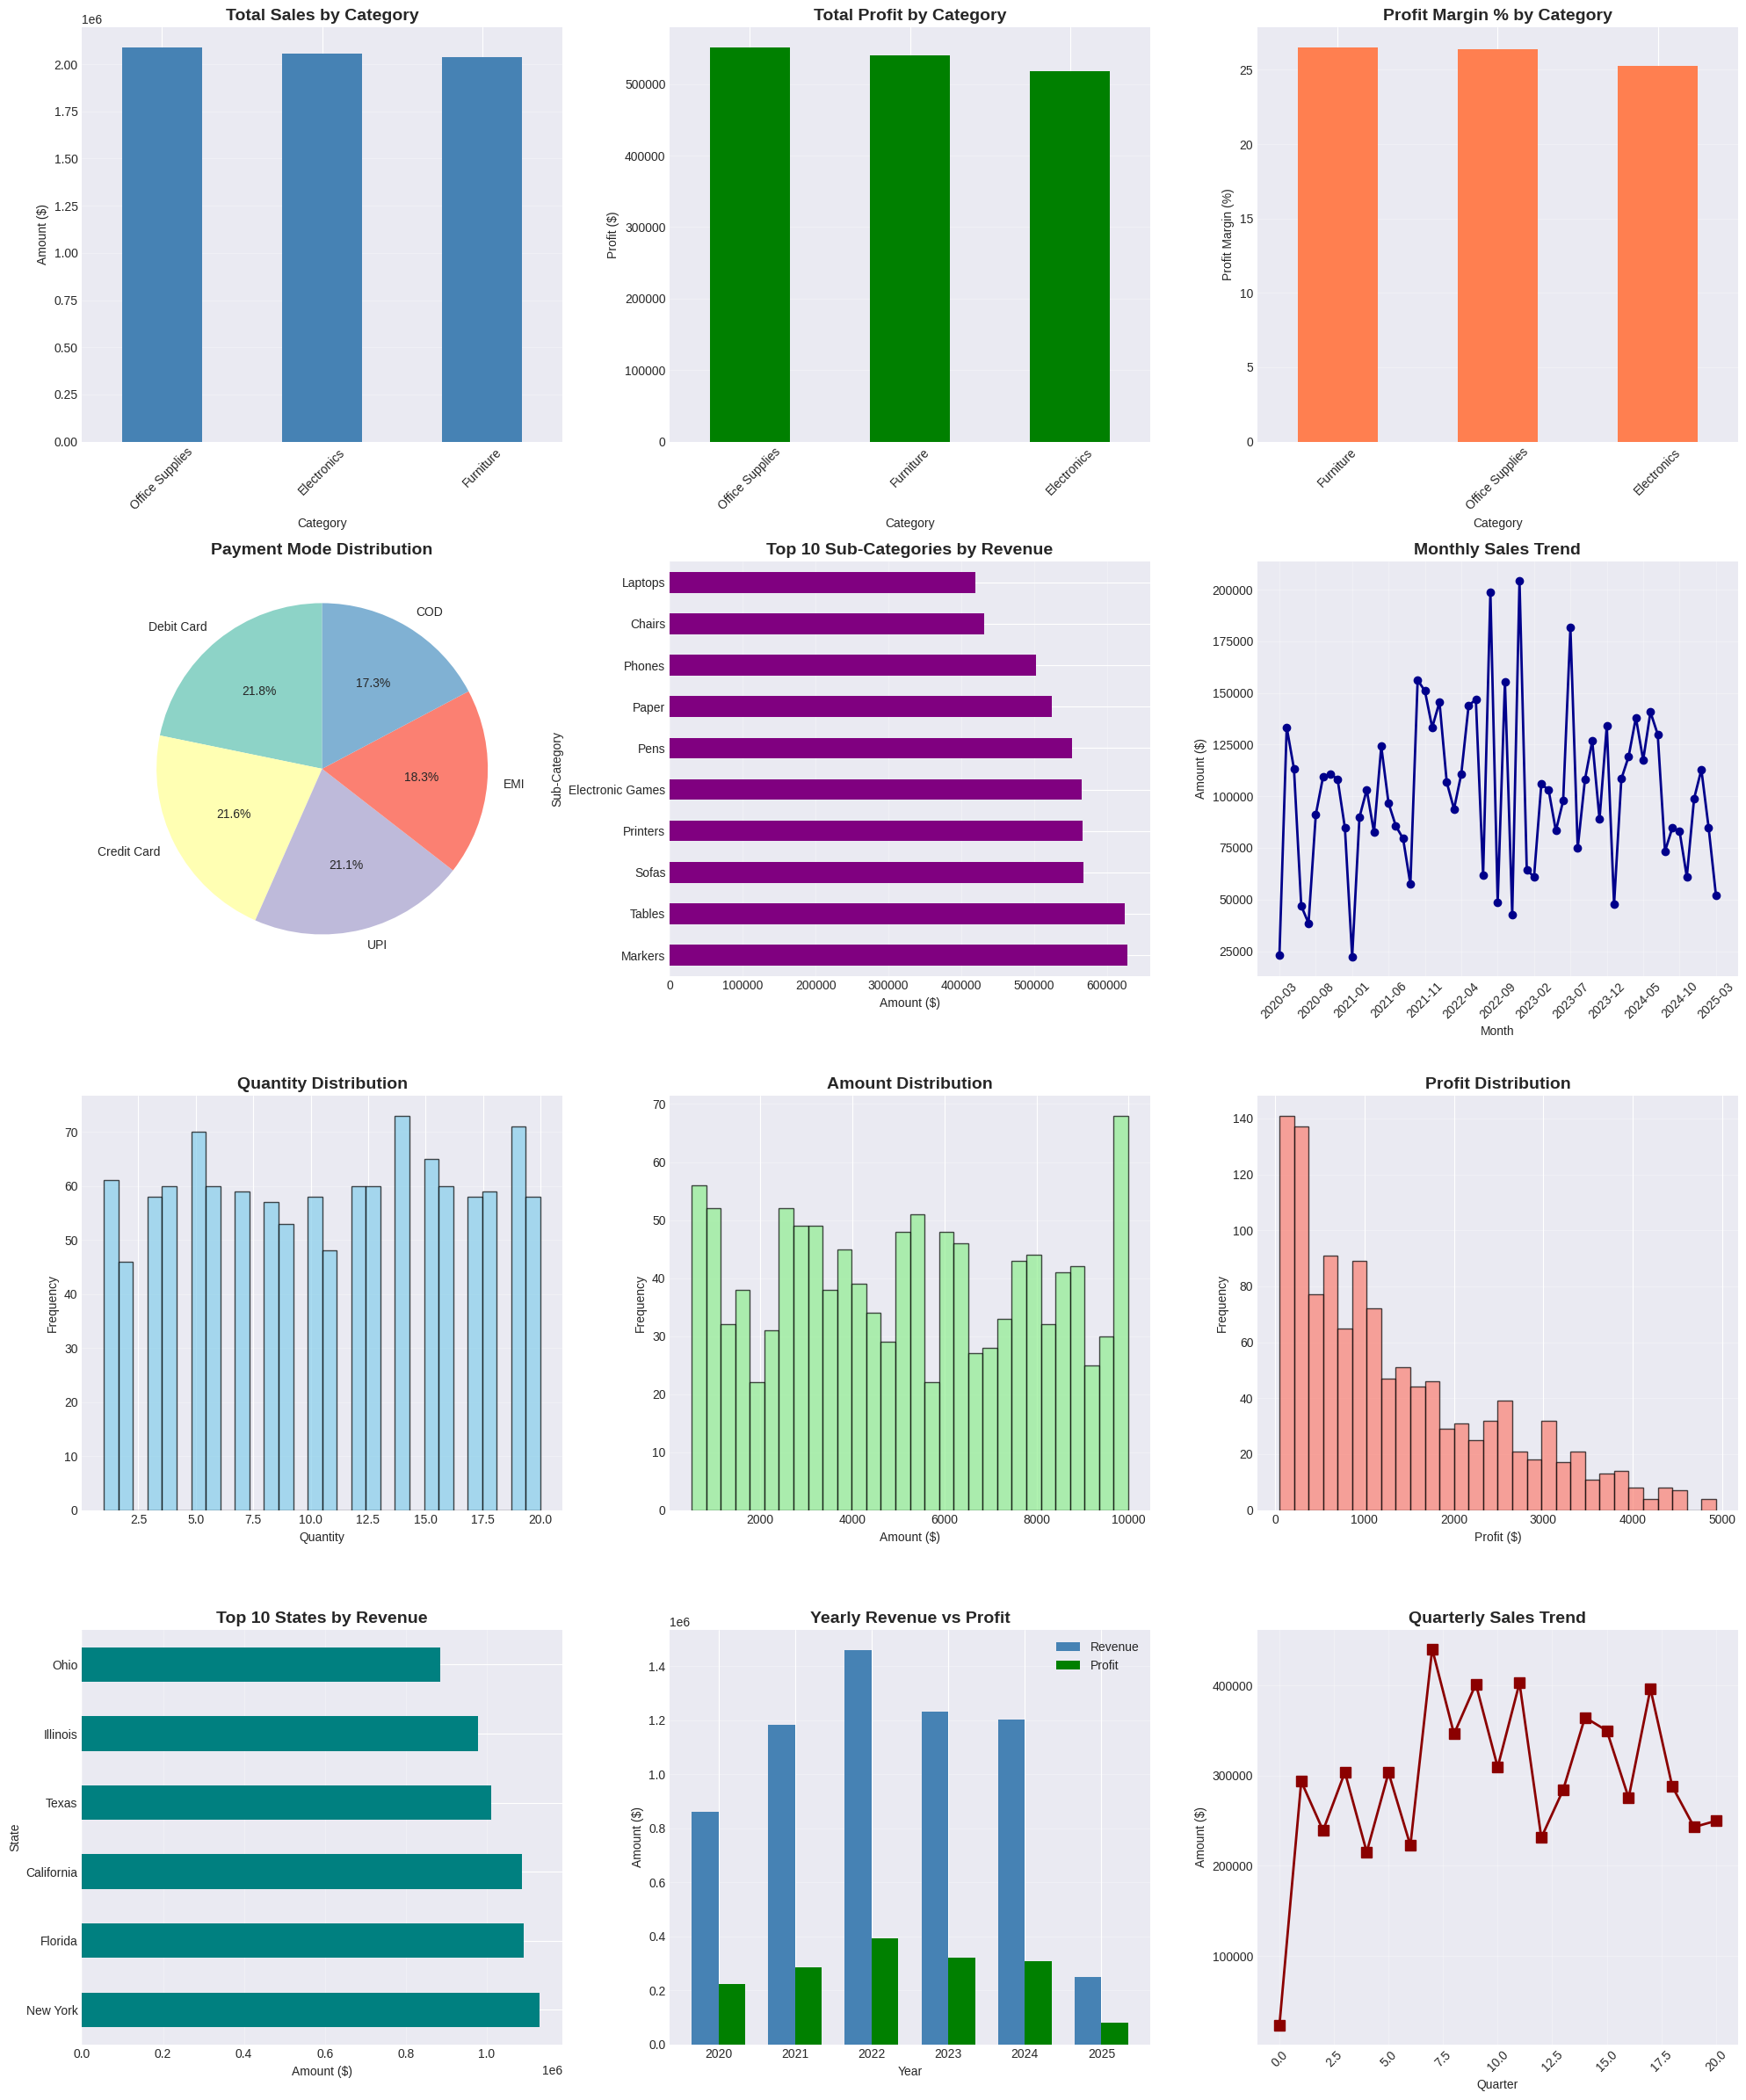

In [32]:
# Create figure with subplots
fig = plt.figure(figsize=(20, 24))

# 1. Sales by Category
ax1 = plt.subplot(4, 3, 1)
category_amount = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_amount.plot(kind='bar', color='steelblue', ax=ax1)
ax1.set_title('Total Sales by Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Category')
ax1.set_ylabel('Amount ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# 2. Profit by Category
ax2 = plt.subplot(4, 3, 2)
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit.plot(kind='bar', color='green', ax=ax2)
ax2.set_title('Total Profit by Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Category')
ax2.set_ylabel('Profit ($)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Profit Margin by Category
ax3 = plt.subplot(4, 3, 3)
profit_margin = (df.groupby('Category')['Profit'].sum() / df.groupby('Category')['Amount'].sum() * 100).sort_values(ascending=False)
profit_margin.plot(kind='bar', color='coral', ax=ax3)
ax3.set_title('Profit Margin % by Category', fontsize=14, fontweight='bold')
ax3.set_xlabel('Category')
ax3.set_ylabel('Profit Margin (%)')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# 4. Payment Mode Distribution
ax4 = plt.subplot(4, 3, 4)
payment_counts = df['PaymentMode'].value_counts()
colors = plt.cm.Set3(range(len(payment_counts)))
ax4.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
ax4.set_title('Payment Mode Distribution', fontsize=14, fontweight='bold')

# 5. Top 10 Sub-Categories by Revenue
ax5 = plt.subplot(4, 3, 5)
top_subcategories = df.groupby('Sub-Category')['Amount'].sum().sort_values(ascending=False).head(10)
top_subcategories.plot(kind='barh', color='purple', ax=ax5)
ax5.set_title('Top 10 Sub-Categories by Revenue', fontsize=14, fontweight='bold')
ax5.set_xlabel('Amount ($)')
ax5.set_ylabel('Sub-Category')
ax5.grid(axis='x', alpha=0.3)

# 6. Monthly Sales Trend
ax6 = plt.subplot(4, 3, 6)
monthly_trend = df.groupby('Year-Month')['Amount'].sum().sort_index()
ax6.plot(range(len(monthly_trend)), monthly_trend.values, marker='o', linewidth=2, markersize=6, color='darkblue')
ax6.set_title('Monthly Sales Trend', fontsize=14, fontweight='bold')
ax6.set_xlabel('Month')
ax6.set_ylabel('Amount ($)')
ax6.tick_params(axis='x', rotation=45)
ax6.grid(True, alpha=0.3)
ax6.set_xticks(range(0, len(monthly_trend), max(1, len(monthly_trend)//12)))
ax6.set_xticklabels(monthly_trend.index[::max(1, len(monthly_trend)//12)], rotation=45)

# 7. Quantity Distribution
ax7 = plt.subplot(4, 3, 7)
ax7.hist(df['Quantity'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax7.set_title('Quantity Distribution', fontsize=14, fontweight='bold')
ax7.set_xlabel('Quantity')
ax7.set_ylabel('Frequency')
ax7.grid(axis='y', alpha=0.3)

# 8. Amount Distribution
ax8 = plt.subplot(4, 3, 8)
ax8.hist(df['Amount'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
ax8.set_title('Amount Distribution', fontsize=14, fontweight='bold')
ax8.set_xlabel('Amount ($)')
ax8.set_ylabel('Frequency')
ax8.grid(axis='y', alpha=0.3)

# 9. Profit Distribution
ax9 = plt.subplot(4, 3, 9)
ax9.hist(df['Profit'], bins=30, color='salmon', edgecolor='black', alpha=0.7)
ax9.set_title('Profit Distribution', fontsize=14, fontweight='bold')
ax9.set_xlabel('Profit ($)')
ax9.set_ylabel('Frequency')
ax9.grid(axis='y', alpha=0.3)

# 10. Top 10 States by Revenue
ax10 = plt.subplot(4, 3, 10)
top_states = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='barh', color='teal', ax=ax10)
ax10.set_title('Top 10 States by Revenue', fontsize=14, fontweight='bold')
ax10.set_xlabel('Amount ($)')
ax10.set_ylabel('State')
ax10.grid(axis='x', alpha=0.3)

# 11. Yearly Sales Comparison
ax11 = plt.subplot(4, 3, 11)
yearly_amount = df.groupby('Year')['Amount'].sum()
yearly_profit = df.groupby('Year')['Profit'].sum()
x = np.arange(len(yearly_amount))
width = 0.35
ax11.bar(x - width/2, yearly_amount.values, width, label='Revenue', color='steelblue')
ax11.bar(x + width/2, yearly_profit.values, width, label='Profit', color='green')
ax11.set_title('Yearly Revenue vs Profit', fontsize=14, fontweight='bold')
ax11.set_xlabel('Year')
ax11.set_ylabel('Amount ($)')
ax11.set_xticks(x)
ax11.set_xticklabels(yearly_amount.index)
ax11.legend()
ax11.grid(axis='y', alpha=0.3)

# 12. Quarterly Sales Trend
ax12 = plt.subplot(4, 3, 12)
quarterly = df.groupby(['Year', 'Quarter'])['Amount'].sum()
ax12.plot(range(len(quarterly)), quarterly.values, marker='s', linewidth=2, markersize=8, color='darkred')
ax12.set_title('Quarterly Sales Trend', fontsize=14, fontweight='bold')
ax12.set_xlabel('Quarter')
ax12.set_ylabel('Amount ($)')
ax12.tick_params(axis='x', rotation=45)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('sales_analysis_dashboard.png', dpi=300, bbox_inches='tight')
print("\nDashboard saved as 'sales_analysis_dashboard.png'")
plt.show()

In [33]:
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Correlation matrix for numerical columns
numerical_cols = ['Amount', 'Profit', 'Quantity', 'Profit Margin %']
correlation_matrix = df[numerical_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))


CORRELATION ANALYSIS

Correlation Matrix:
                 Amount  Profit  Quantity  Profit Margin %
Amount            1.000   0.675     0.045           -0.001
Profit            0.675   1.000     0.066            0.654
Quantity          0.045   0.066     1.000            0.024
Profit Margin %  -0.001   0.654     0.024            1.000


Correlation matrix saved as 'correlation_matrix.png'


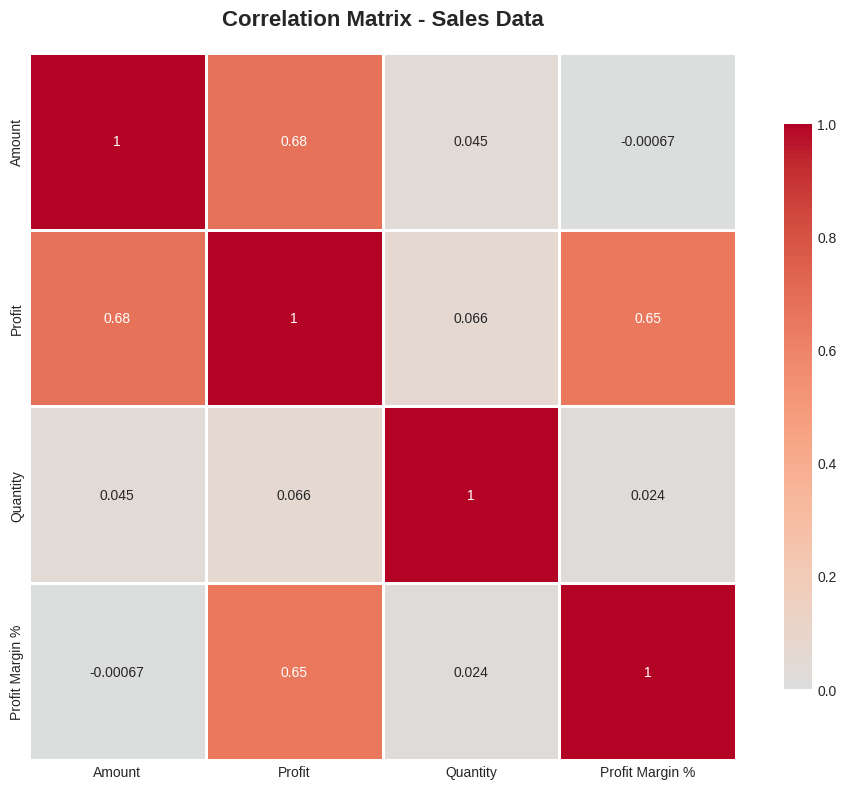

In [34]:
# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Sales Data', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
print("Correlation matrix saved as 'correlation_matrix.png'")
plt.show()


In [35]:
print("\n" + "="*80)
print("KEY INSIGHTS SUMMARY")
print("="*80)

total_revenue = df['Amount'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
avg_order_value = df['Amount'].mean()
overall_profit_margin = (total_profit / total_revenue * 100)

print(f"\n📊 OVERALL BUSINESS METRICS")
print(f"{'='*60}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ${avg_order_value:,.2f}")
print(f"Overall Profit Margin: {overall_profit_margin:.2f}%")

print(f"\n🏆 TOP PERFORMERS")
print(f"{'='*60}")
print(f"Best Category: {category_amount.index[0]} (${category_amount.values[0]:,.2f})")
print(f"Most Profitable Category: {category_profit.index[0]} (${category_profit.values[0]:,.2f})")
print(f"Top State: {top_states.index[0]} (${top_states.values[0]:,.2f})")
print(f"Most Used Payment Mode: {payment_counts.index[0]} ({payment_counts.values[0]} orders)")

print(f"\n📈 TRENDS")
print(f"{'='*60}")
best_month = monthly_trend.idxmax()
best_month_sales = monthly_trend.max()
print(f"Best Month: {best_month} (${best_month_sales:,.2f})")
print(f"Average Monthly Sales: ${monthly_trend.mean():,.2f}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print("\nGenerated Files:")
print("  1. sales_analysis_dashboard.png - Main visualization dashboard")
print("  2. correlation_matrix.png - Correlation heatmap")
print("\nAll analysis metrics have been printed above.")


KEY INSIGHTS SUMMARY

📊 OVERALL BUSINESS METRICS
Total Revenue: $6,182,639.00
Total Profit: $1,610,697.00
Total Orders: 547
Average Order Value: $5,178.09
Overall Profit Margin: 26.05%

🏆 TOP PERFORMERS
Best Category: Office Supplies ($2,089,510.00)
Most Profitable Category: Office Supplies ($551,575.00)
Top State: New York ($1,130,048.00)
Most Used Payment Mode: Debit Card (260 orders)

📈 TRENDS
Best Month: 2022-12 ($204,413.00)
Average Monthly Sales: $101,354.74

ANALYSIS COMPLETE!

Generated Files:
  1. sales_analysis_dashboard.png - Main visualization dashboard
  2. correlation_matrix.png - Correlation heatmap

All analysis metrics have been printed above.
